In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv(r"C:\Users\Admin\OneDrive\Documents\zoo.csv")

Shape of the dataset: (101, 18)
Missing values in each column:
animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


<Figure size 1000x600 with 0 Axes>

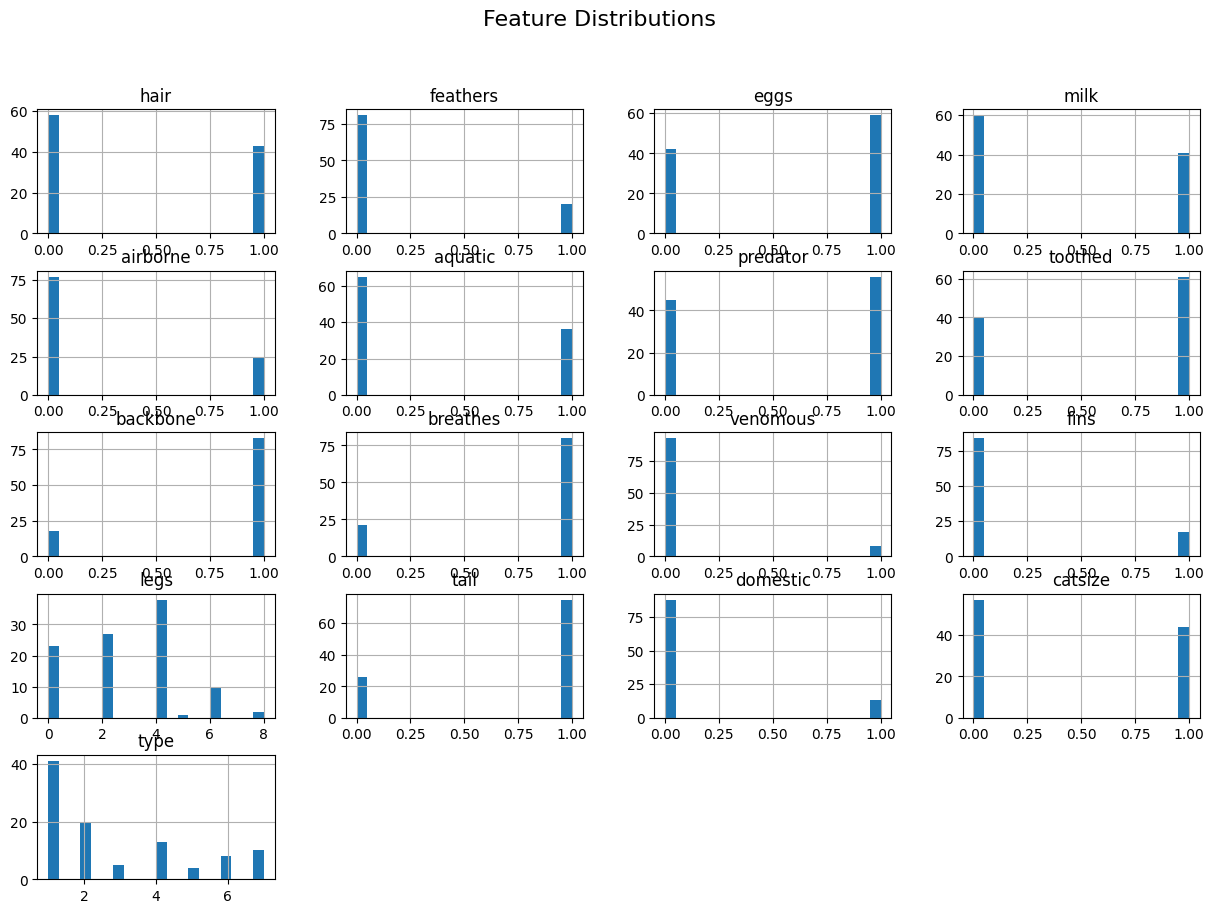

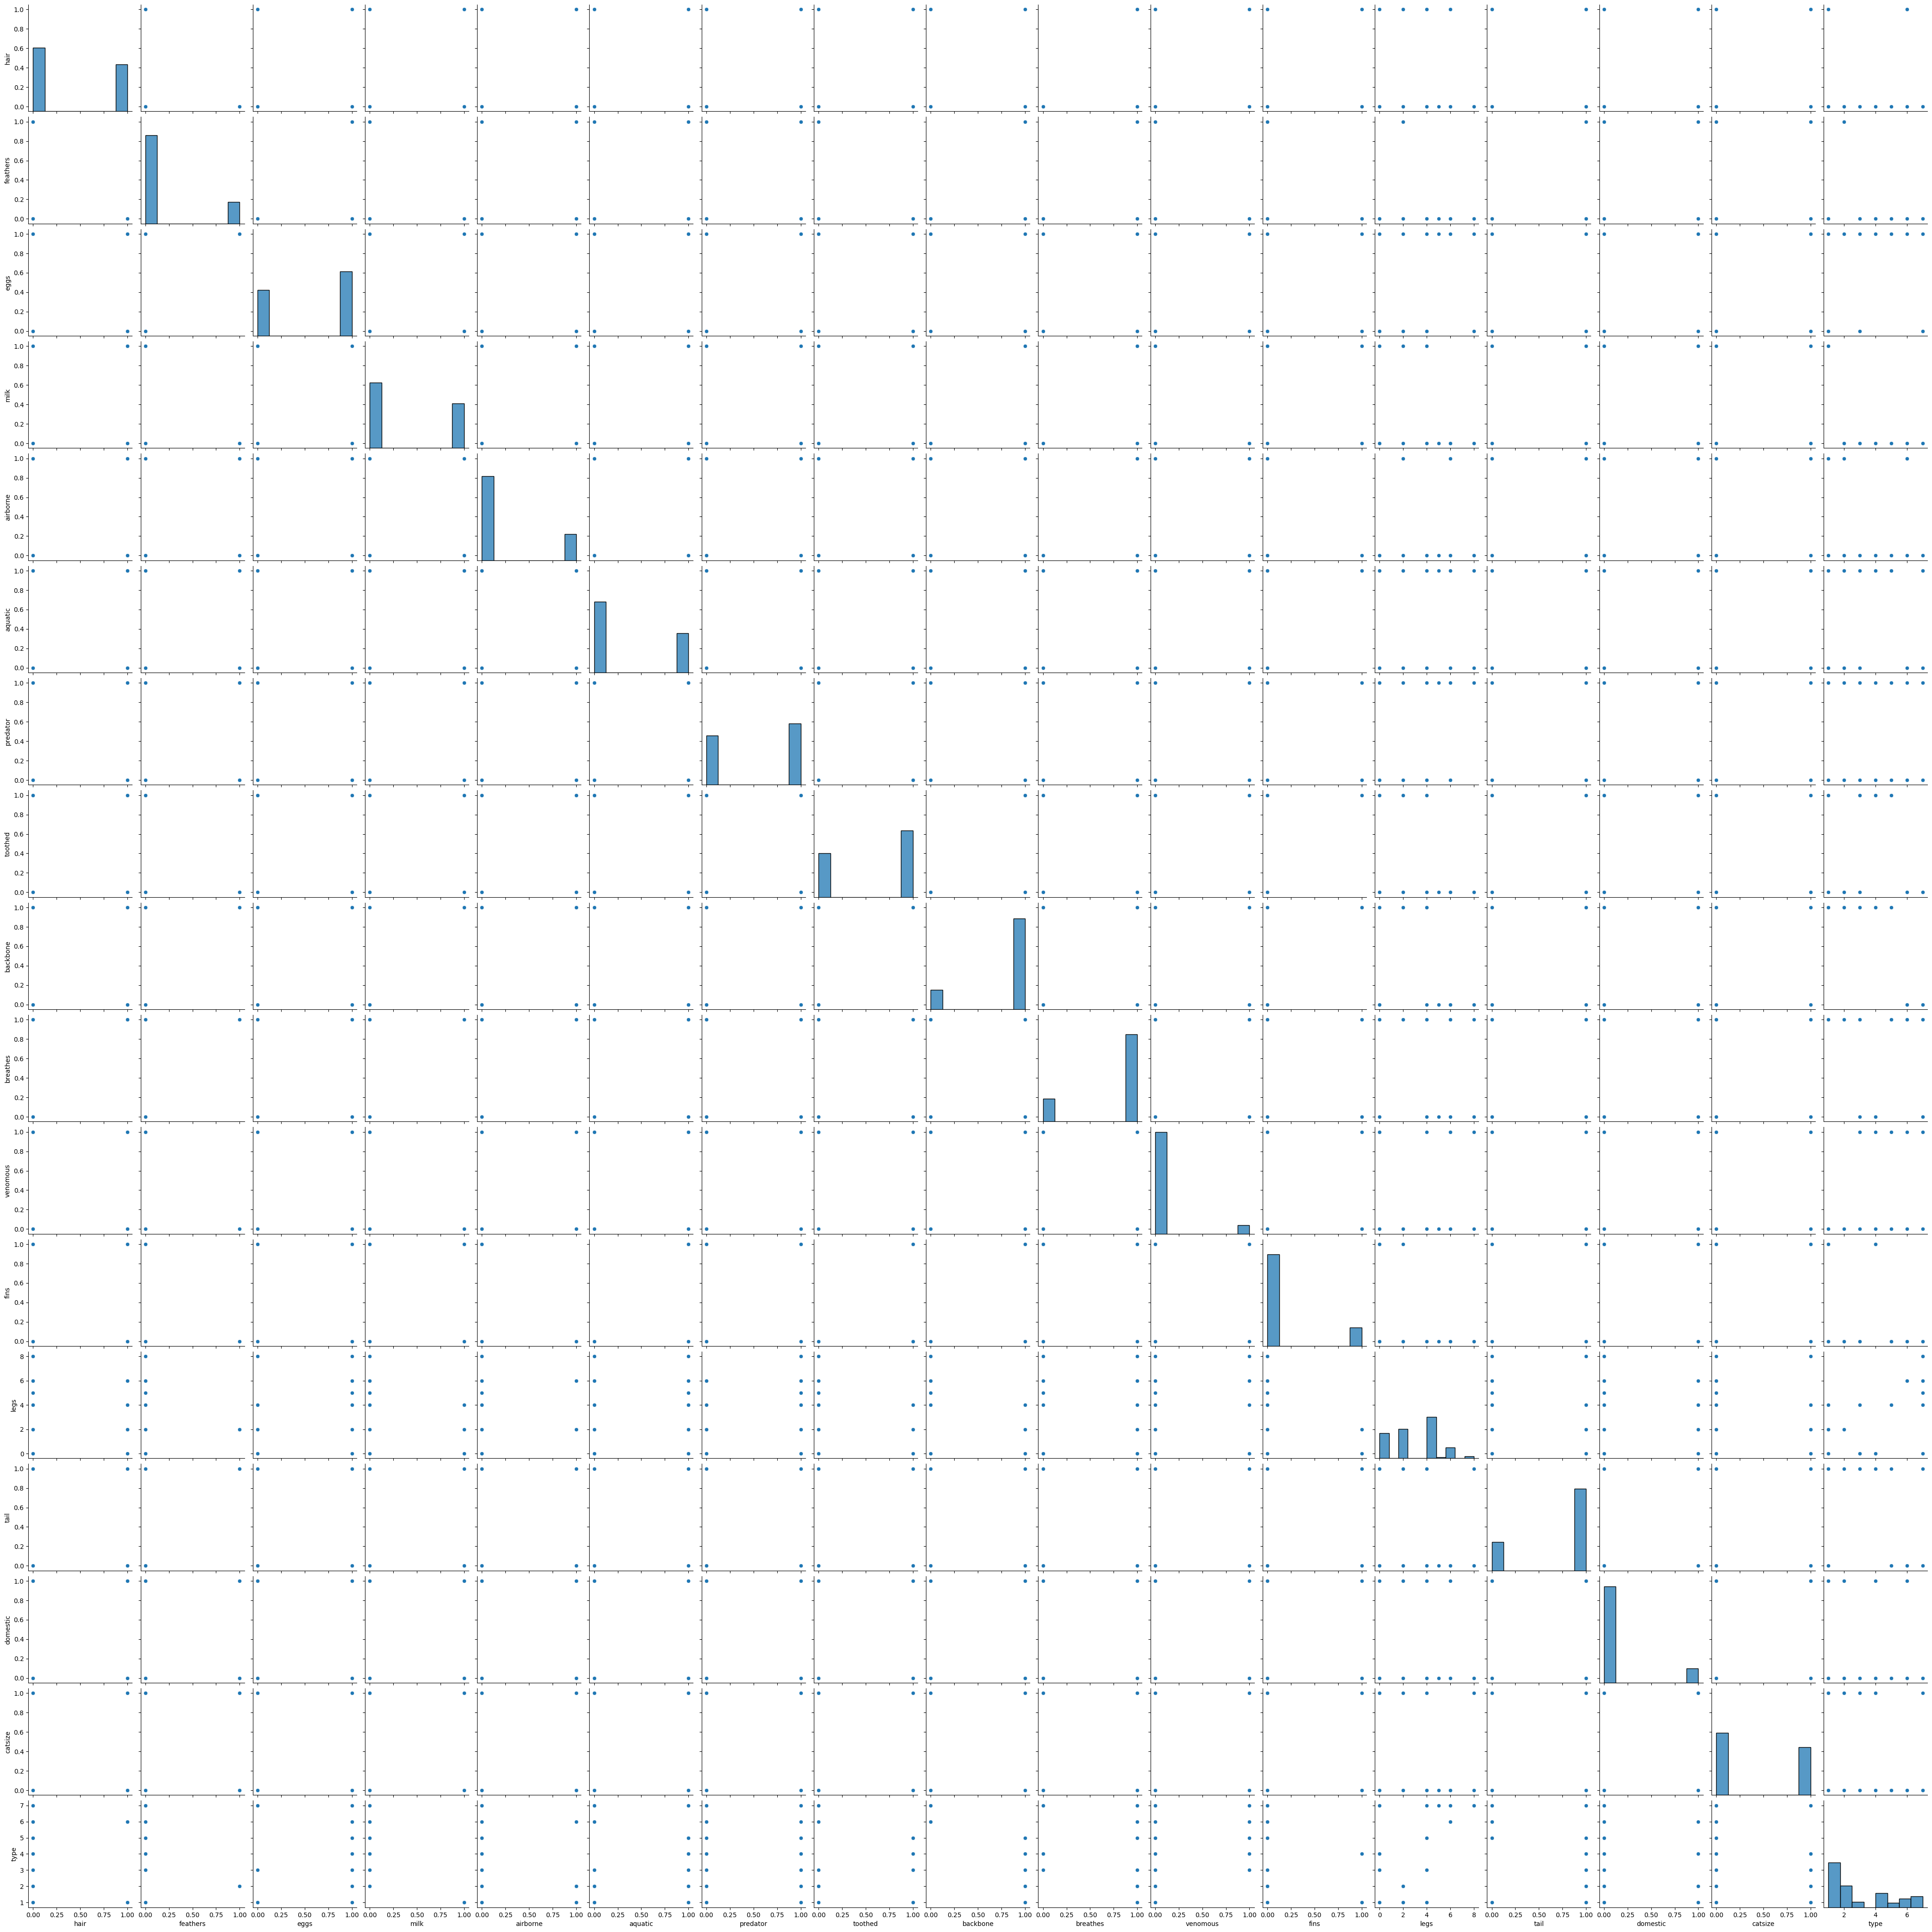

In [4]:

print("Shape of the dataset:", df.shape)

print("Missing values in each column:")
print(df.isnull().sum())

plt.figure(figsize=(10, 6))
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

sns.pairplot(df)
plt.show()




In [11]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [21]:
# Step 2: Define features (X) and target (y)
X = df.drop('type', axis=1)  # Excluding 'type' as the target variable
y = df['type']  # Target variable (animal type)

# Step 4: Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Step 6: Train the KNN model
knn.fit(X_train, y_train)

# Step 7: Predict on the test set
y_pred = knn.predict(X_test)

# Step 8: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")


Accuracy on the test set: 52.38%


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


y_pred = knn.predict(X_test)

# Step 2: Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Step 3: Calculate precision, recall, and F1-score for the multi-class classification
precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' handles multi-class scenarios
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Step 4: Print the metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Accuracy: 52.38%
Precision: 0.50
Recall: 0.52
F1-score: 0.48


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Local\Temp\ipykernel_8296\3290921266.py:30: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_2d['hair'], X_test_2d['feathers'], c=y_test_2d, edgecolor='k', cmap=plt.cm.Paired, marker='x', label='Test')


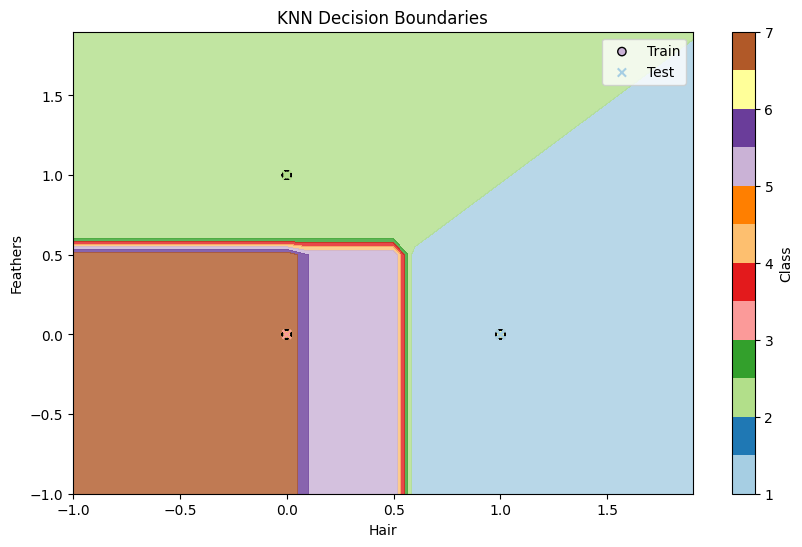

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Select two features for visualization (e.g., 'hair' and 'feathers')
X_2d = X[['hair', 'feathers']]  # Select two features for simplicity
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y, test_size=0.2, random_state=42)

# Step 2: Train the KNN classifier on these two features
knn_2d = KNeighborsClassifier(n_neighbors=3)
knn_2d.fit(X_train_2d, y_train_2d)

# Step 3: Create a grid of points covering the feature space
x_min, x_max = X_2d['hair'].min() - 1, X_2d['hair'].max() + 1
y_min, y_max = X_2d['feathers'].min() - 1, X_2d['feathers'].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Step 4: Predict the class for each point in the grid
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 5: Plot the decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

# Step 6: Overlay the training points
plt.scatter(X_train_2d['hair'], X_train_2d['feathers'], c=y_train_2d, edgecolor='k', cmap=plt.cm.Paired, marker='o', label='Train')
plt.scatter(X_test_2d['hair'], X_test_2d['feathers'], c=y_test_2d, edgecolor='k', cmap=plt.cm.Paired, marker='x', label='Test')

# Step 7: Add labels and legend
plt.title("KNN Decision Boundaries")
plt.xlabel("Hair")
plt.ylabel("Feathers")
plt.colorbar(label="Class")
plt.legend()
plt.show()
